# 🧠 Modelo de Regressão para Previsão de Preços de Veículos


## 📌 2. Data Understanding

**Objetivo**: entender o conteúdo, a estrutura e a qualidade dos dados.

🔍 **Atividades:**
- Analisa a qualidade inicial dos dados
- Verifica valores ausentes, tipos de dados, distribuições
- Identifica valores extremos, inconsistências, duplicatas
- Verifica a estrutura dos dados
- Realiza estatísticas descritivas iniciais (describe, value_counts)



In [56]:
# Carrega Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

%matplotlib inline

# Setup para mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)

In [42]:
# Carrega Dataset

colls = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]


file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(file_path, names=colls)

# Visualiza as 5 primeiras linhas
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [43]:
# Verifica o número de colunas e linhas do datafrme
total_raw_rows = df.shape[0]
total_raw_cols = df.shape[1]
print("Nº de Linhas:",total_raw_rows)
print("N° de Colunas:",total_raw_cols)

Nº de Linhas: 205
N° de Colunas: 26


In [44]:
# Verifica o tipo de dados das colunas
print("Tipo de Dados:")
df.dtypes

Tipo de Dados:


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [45]:
# Verifica valores nulos
print("Valores Nulos:")
print(df.isnull().sum())

# Mostra valores nulos
#df[df.isnull()]

Valores Nulos:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [46]:
# Verificar valores Inconsistentes '?' que precisam ser substituídos
print("Contagem de valores '?' por coluna:")
print((df == '?').sum())

Contagem de valores '?' por coluna:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [47]:
# Verifica a presença de dados duplicados
df.duplicated().sum()

# Mostra os dados duplicados, se houver
df[df.duplicated()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [48]:
# Trata inconsistência dos dados para analisar a variável `price`
df['price'] = df['price'].replace('?', np.nan)
df.dropna(subset=['price'], axis=0, inplace=True)
# Converte cooluna para formato numérico
df["price"] = pd.to_numeric(df["price"])

print("Resumo Estatístico - Variáveis Numéricas:")
df.describe()

Resumo estatístico das variáveis numéricas:


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [49]:
print("Resumo Estatístico - Variáveis Categóricas:")
df.describe(include=['object'])

Resumo Estatístico - Variáveis Categóricas:


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500
freq,37,32,181,165,113,94,118,198,145,157,92,23,19,19,36


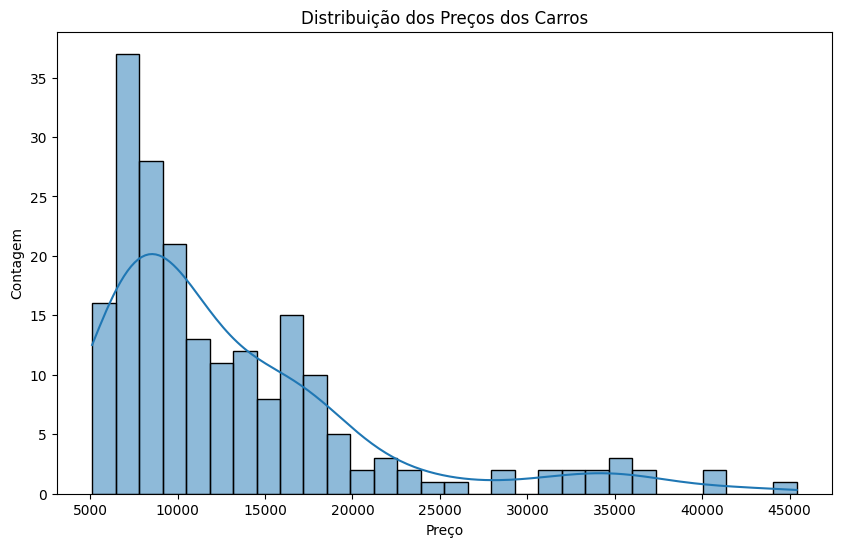

Mediana 10295.0
Media 13207.129353233831
Distribuição Assimetrica á Direita: moda < media < mediana 


In [55]:
# Análise da distribuição da variável target (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribuição dos Preços dos Carros')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.show()


print("Mediana", df['price'].median())
print("Media", df['price'].mean())
print("Distribuição Assimetrica á Direita: moda < media < mediana ")

In [57]:
signif = 0.05
stat_test, p_valor = normaltest(df['price'])
print(stat_test)
print(p_valor)

# True - ou seja rejeita a Hipotese Nula, nos diz que a coluna `price` não faz parte de uma distribuição normal
if p_valor <= signif:
    print("Hipótese Nula Rejeitada - Distribuição não é normal!!")
else:
    print("Distribuição é normal!!")

78.3737893700999
9.579611029816525e-18
Hipótese Nula Rejeitada - Distribuição não é normal!!


Total de Outliers Identificados:  14


<Axes: title={'center': 'Preço'}, xlabel='USD'>

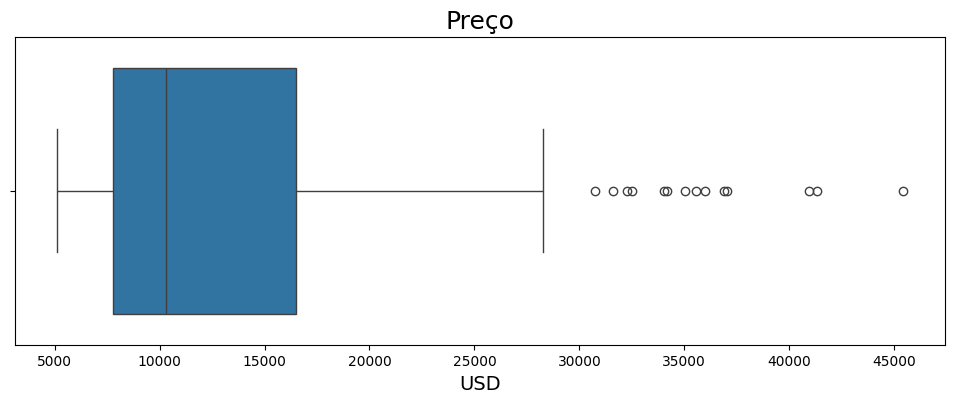

In [58]:
# Verifica Presença de Outliers

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outliers = df[((df['price'] < lower_bound) | (df['price'] > upper_bound))]

print("Total de Outliers Identificados: ", df_outliers.shape[0])

ax = sns.boxplot(x='price', data=df)

ax.figure.set_size_inches(12, 4)
ax.set_title('Preço', fontsize=18)
ax.set_xlabel('USD', fontsize=14)
ax

<Axes: title={'center': 'Preço por Fabricante'}, xlabel='Fabricante', ylabel='make'>

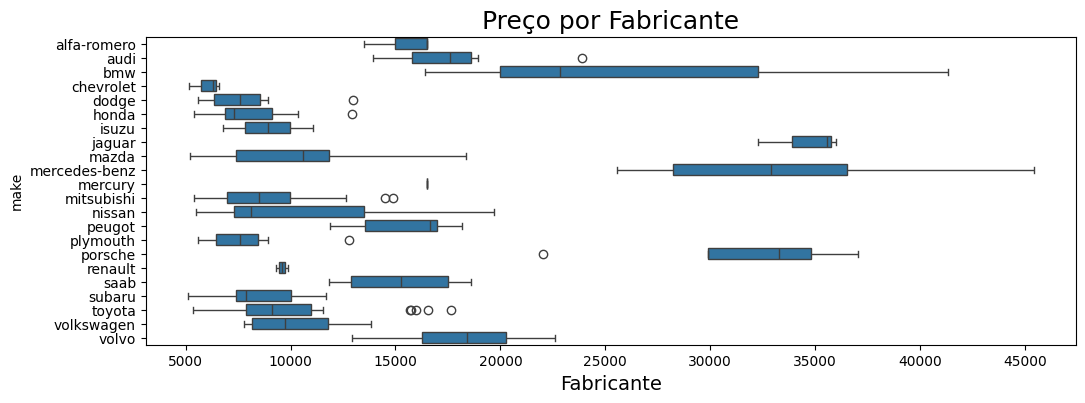

In [60]:
# Verifica a distribuição dos Dados por fabricante
ax = sns.boxplot(x='price', y='make', data=df)

ax.figure.set_size_inches(12, 4)
ax.set_title('Preço por Fabricante', fontsize=18)
ax.set_xlabel('Fabricante', fontsize=14)
ax

# Analisando a dispersão por fabricante, vemos que os veículos de marca = ['bmw, 'mercedez-benz', `porsche`] veículos de luxo possui uma maior discrepância

<Axes: title={'center': 'Preço por Fabricante'}, xlabel='Fabricante', ylabel='make'>

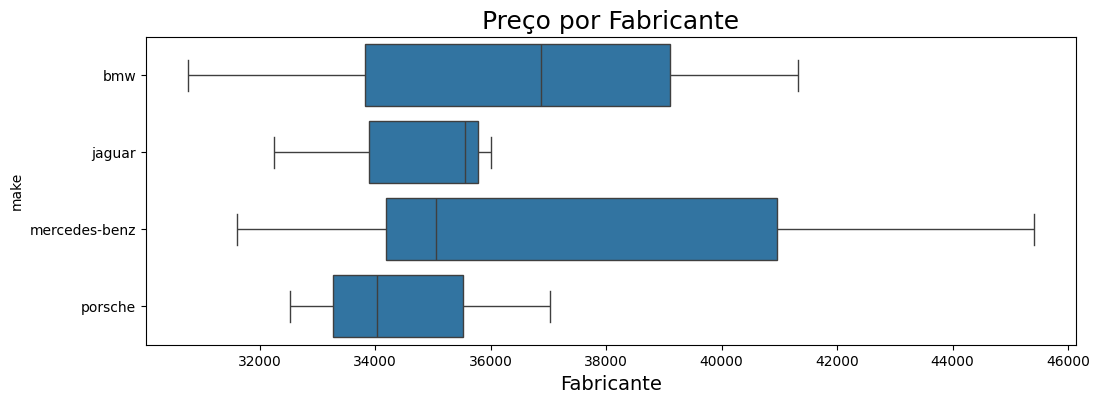

In [59]:
# Plota BoxPlot com preços > 30k por fabricante
ax = sns.boxplot(x='price', y='make', data=df.query('price > 30000') )

ax.figure.set_size_inches(12, 4)
ax.set_title('Preço por Fabricante', fontsize=18)
ax.set_xlabel('Fabricante', fontsize=14)
ax

# Filtrando os preços > 30k  fica mais evidente que os fabricantes bmw e mercedez possuem uma maior discrepância 

### 📋 Initial Observations

#### Issues Qualidade dos Dados:

| Nº Item | Item                                                   | Status  | Comentários                                                 |
|---------|--------------------------------------------------------|---------|-------------------------------------------------------------|
| 01      | Valores ausentes (Missing Data)                        | OK      | não identificado                                            |
| 02      | Duplicidade de registros                               | OK      | não identificado                                            |
| 03      | Inconsistência de formato                              | OK      | não identificado                                            |
| 04      | Erros de digitação                                     | OK      | não identificado                                            |
| 05      | Valores fora do intervalo esperado (Outliers)          | not OK  | identificado 14 registros com preços acima de 30k           |
| 06      | Tipos de dados incorretos                              | Not OK  | alterar formato das colunas categórica `object`             |
| 07      | Dados inconsistentes entre colunas                     | Not OK  | Sete colunas com valores inconsistentes "?"                 |
| 08      | Alta cardinalidade em variáveis categóricas            | Ok      | não identificado                                            |
| 09      | Dados desatualizados                                   | NA      | não aplicável                                               |
| 10      | Dados incompletos (sem cobertura em algumas regiões)   | Ok      | não identificado                                            |


#### Distribuição dos Dados
- Presença de outliers na variável `price` com 14 registros acima da média, verificado que os fabricantes `bmw`, `mercedez-bens`, `porsche` possui uma maior discrepância com valores acima de 30k
- A distribuição da variável target `price` é Assimétrica (Skewness) á Direita (Moda < Media < Mediana);
- O teste de normalidade rejeitou a hipótese nula, logo a distribuição não é normal (p-value < significancia_alpha).



In [62]:
df[df['make'] == "bmw"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
